<a href="https://colab.research.google.com/github/priyanka4678/Assignment_on_python_for_DSA/blob/main/Priyanka_Kumari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **To Read File**

In [3]:
data=pd.read_excel('/content/iris.xls')

In [4]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### **To Get Basic Information**

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **To Check null values**

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### **To Fill null values in columns**

In [8]:
for i in ['SL','SW','PL']:
       data[i]=data[i].fillna(data[i].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### **To Encode Object Type dtype**

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [13]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [38]:
data['Classification']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int64

### **To Get Co-Relation Matrix**

In [14]:
corr_matrix=data.corr()

In [15]:
corr_matrix

,SL,SW,PL,PW,Classification
SL,1.000000,-0.099107,0.830554,0.800939,0.774077
SW,-0.099107,1.000000,-0.405531,-0.338655,-0.403796
PL,0.830554,-0.405531,1.000000,0.936089,0.927509
PW,0.800939,-0.338655,0.936089,1.000000,0.956464
Classification,0.774077,-0.403796,0.927509,0.956464,1.000000


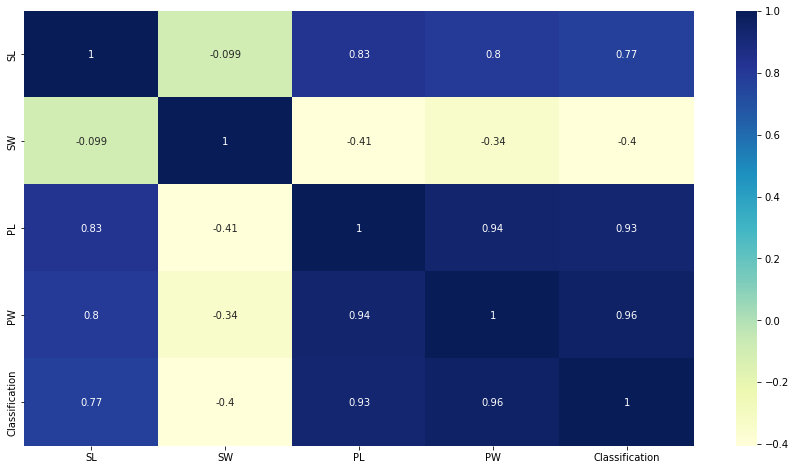

In [17]:
plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

## **Extracting the Target Variable and making them into train_test_split Model**

In [18]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int64

In [37]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Classification, Length: 120, dtype: int64

### **Logistic Regression Method**

In [20]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [23]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


### **KNN Method**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
metric_k=[]
neighbors=np.arange(3,15)

In [27]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train,y_train)
  y_prediction=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_prediction)
  metric_k.append(acc)

In [28]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

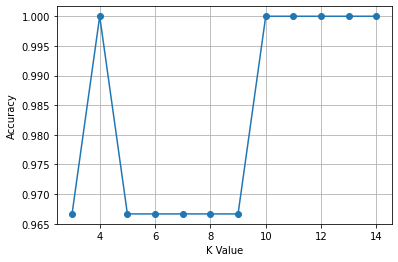

In [29]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid()

In [40]:
classifier=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

In [41]:
print('Accuracy is :',accuracy_score(y_test,y_prediction))

Accuracy is : 1.0


In [42]:
confusion_matrix(y_test,y_prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [43]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

In [44]:
print('Accuracy is :',accuracy_score(y_test,y_prediction))

Accuracy is : 0.9666666666666667


In [45]:
confusion_matrix(y_test,y_prediction)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

### **SVM Method**

In [46]:
from sklearn.svm import SVC

In [47]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
accuracy_score(y_test,y_pred_svm)

1.0

In [50]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [51]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm=svm_cls1.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [53]:
accuracy_score(y_test,y_pred_svm)

1.0

### **Decision Tree Method**

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [55]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [56]:
accuracy_score(y_test,y_pred_dt)

1.0

### **Random Forest Method**

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [59]:
accuracy_score(y_test,y_pred_rf)

1.0

## **Conclusion:** All the classification Model gives the same result